Import libraries and graph

In [84]:
import matplotlib.pyplot as plt
from cmath import sqrt
import networkx as nx
import pandas as pd
import numpy as np
from math import *

G_fb = nx.read_edgelist("./facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


Presentation of the graph

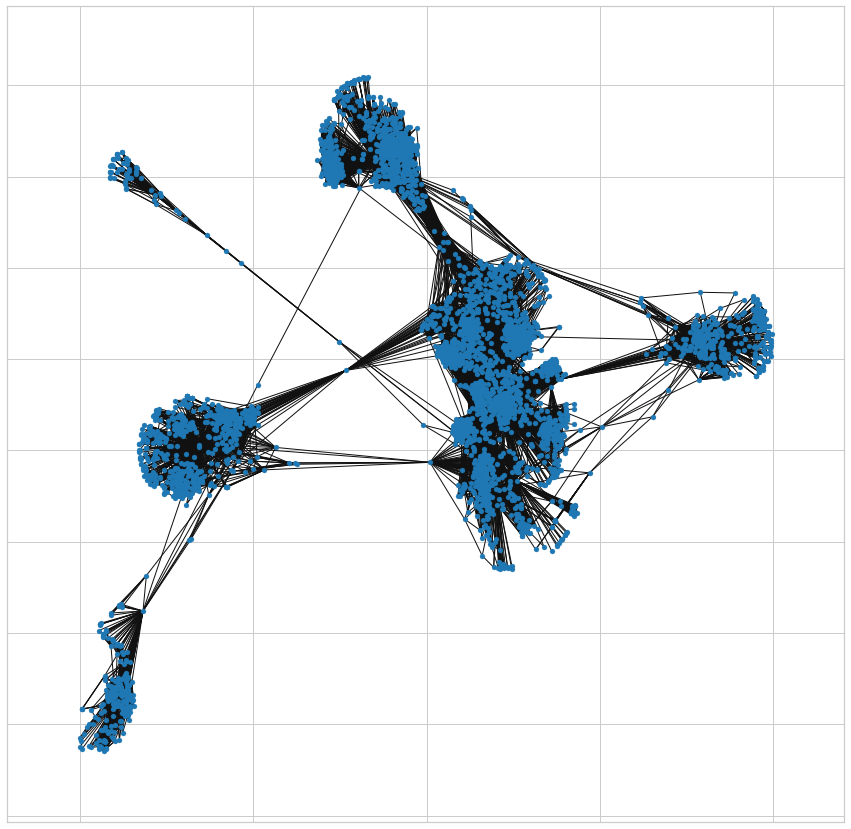

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
nx.draw_networkx(G_fb, node_size=25, with_labels=False)


Calculate Centrality measures for each node of the graph

In [66]:
dc, bc, cc, ec = [], [], [], []
node_list = []

degCent = nx.degree_centrality(G_fb)
betCent = nx.betweenness_centrality(G_fb)
closCent = nx.closeness_centrality(G_fb)
eigCent = nx.eigenvector_centrality(G_fb)

# Convert it to list
for i in (degCent):
    dc.append(degCent[i])
for i in (betCent):
    bc.append(betCent[i])
for i in (closCent):
    cc.append(closCent[i])
for i in (eigCent):
    ec.append(eigCent[i])

# Put all nodes number in a list so we can use it as an index in our DataFrame
for i in (eigCent):
    node_list.append(i)

decision_matrix = pd.DataFrame ({'DC': dc, 'BC': bc, 'CC': cc, 'EC': ec},  index=node_list)
decision_matrix

,DC,BC,CC,EC
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...
4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,0.000991,7.156847e-08,0.184005,2.989233e-10


Calculate normalized decision matrix

In [67]:
def normalizeDecisionMtrix(centrality_mesure):
    somme = 0
    list_tmp = []
    for x in (centrality_mesure.values):
        somme = somme + (x**2)
    somme = sqrt(somme)

    for i in (centrality_mesure.values):
        list_tmp.append(i/somme)

    return list_tmp

dc_n = normalizeDecisionMtrix(decision_matrix['DC'])
bc_n = normalizeDecisionMtrix(decision_matrix['BC'])
cc_n = normalizeDecisionMtrix(decision_matrix['CC'])
ec_n = normalizeDecisionMtrix(decision_matrix['EC'])

normalized_decision_matrix = pd.DataFrame ({'DC': dc_n, 'BC': bc_n, 'CC': cc_n, 'EC': ec_n},  index=node_list)
normalized_decision_matrix

,DC,BC,CC,EC
0,0.080016,1.973686e-01,0.019962,3.391796e-05
1,0.003920,3.754674e-06,0.014766,6.045346e-07
2,0.002306,1.024578e-07,0.014760,2.233461e-07
3,0.003920,2.273176e-06,0.014766,6.635648e-07
4,0.002306,2.482632e-07,0.014760,2.236416e-07
...,...,...,...,...
4034,0.000461,0.000000e+00,0.010394,2.951270e-10
4035,0.000231,0.000000e+00,0.010394,2.912901e-10
4036,0.000461,0.000000e+00,0.010394,2.931223e-10
4037,0.000922,9.654680e-08,0.010395,2.989233e-10


Calculate weighted decision matrix

In [68]:
for i in range(0, len(dc)):
    dc_n[i] = dc_n[i] * 0.2
    ec_n[i] = ec_n[i] * 0.2
    bc_n[i] = bc_n[i] * 0.3
    cc_n[i] = cc_n[i] * 0.3

weighted_decision_matrix = pd.DataFrame ({'DC': dc_n, 'BC': bc_n, 'CC': cc_n, 'EC': ec_n},  index=node_list)
weighted_decision_matrix

,DC,BC,CC,EC
0,0.016003,5.921058e-02,0.005989,6.783592e-06
1,0.000784,1.126402e-06,0.004430,1.209069e-07
2,0.000461,3.073735e-08,0.004428,4.466922e-08
3,0.000784,6.819527e-07,0.004430,1.327130e-07
4,0.000461,7.447896e-08,0.004428,4.472831e-08
...,...,...,...,...
4034,0.000092,0.000000e+00,0.003118,5.902541e-11
4035,0.000046,0.000000e+00,0.003118,5.825803e-11
4036,0.000092,0.000000e+00,0.003118,5.862447e-11
4037,0.000184,2.896404e-08,0.003119,5.978465e-11


Determine the positive ideal solution A+ and the negative ideal solution A-

In [69]:
positive_ideal = np.array([np.amax(dc_n), np.amax(bc_n), np.amax(cc_n), np.amax(ec_n)])
negative_ideal = np.array([np.amin(dc_n), np.amin(bc_n), np.amin(cc_n), np.amin(ec_n)])
print("A+ = ", positive_ideal)
print("A- = ", negative_ideal)

A+ =  [0.04819435 0.19446755 0.00779116 0.01908139]
A- =  [4.61189980e-05 0.00000000e+00 3.02112641e-03 1.27705307e-14]


Calculate the positive ideal alternative Si+ and the negative ideal alternative Si-

In [70]:
positive_ideal_alternative = []
negative_ideal_alternative = []

for i in (node_list) :
    s_pos_element, s_neg_element = 0, 0
    
    for j in range(4) :
        s_pos_element = s_pos_element + ( ( weighted_decision_matrix.loc[i][j] - positive_ideal[j] ) ** 2 )
        s_neg_element = s_neg_element + ( ( weighted_decision_matrix.loc[i][j] - negative_ideal[j] ) ** 2 )

    s_pos_element = sqrt(s_pos_element)
    s_neg_element = sqrt(s_neg_element)
    
    positive_ideal_alternative.append(s_pos_element)
    negative_ideal_alternative.append(s_neg_element)

Calculate the relative closeness to the ideal solution Ci

In [71]:
relative_closeness_to_the_ideal_solution = []

for i in range (len(node_list)) :
    tmp_var = ( negative_ideal_alternative[i] / ( negative_ideal_alternative[i] + positive_ideal_alternative[i] ) )
    relative_closeness_to_the_ideal_solution.append(tmp_var)

Final table with the descending rank of the relative closeness to the ideal solution Ci

In [72]:
table = pd.DataFrame ({ 
                        'Si+': positive_ideal_alternative,
                        'Si-': negative_ideal_alternative,
                        'Ci': relative_closeness_to_the_ideal_solution},
                        index=node_list,
)
table["Ranking"] = table["Ci"].rank(ascending=False).astype(int)

table[table['Ranking'] <= 10].sort_values(by=["Ranking"])

,Si+,Si-,Ci,Ranking
107,0.019029,0.200396,0.913277,1
1684,0.061948,0.141539,0.695566,2
1912,0.102563,0.100961,0.496063,3
3437,0.103349,0.098846,0.488865,4
0,0.140349,0.061395,0.304321,5
1085,0.142845,0.060458,0.297379,6
698,0.155715,0.046803,0.231106,7
567,0.163087,0.039165,0.193646,8
58,0.168330,0.034346,0.169464,9
428,0.174851,0.026805,0.132923,10


Finding Top 10 nodes of TOPSIS and each Centrality Measures

In [73]:
# k = int(input("Write the top k number of node that you want : "))
k = 10

# top k nodes according to TOPSIS
top_k_node_topsis = []
topsis_nodes = table[table['Ranking'] <= k].sort_values(by=["Ranking"]).index
top_k_node_topsis = topsis_nodes.values.tolist()

# now we will take top k nodes from each centrality mesures and apply SI Model on it
# Top k nodes accordin to Degree Centrality

top_k_node_DC = []
degCent = pd.DataFrame({"dc_value": normalized_decision_matrix["DC"]}, index=node_list)
degCent["rank_dc"] = degCent["dc_value"].rank(ascending=False).astype(int)
degCent_nodes = degCent[degCent["rank_dc"] <= k].sort_values(by=["rank_dc"]).index
top_k_node_DC = degCent_nodes.values.tolist()

# Top k nodes accordin to Betweeness Centrality
top_k_node_BC = []
betCent = pd.DataFrame({"bc_value": normalized_decision_matrix["BC"]}, index=node_list)
betCent["rank_bc"] = betCent["bc_value"].rank(ascending=False).astype(int)
betCent_nodes = betCent[betCent["rank_bc"] <= k].sort_values(by=["rank_bc"]).index
top_k_node_BC = betCent_nodes.values.tolist()

# Top k nodes accordin to Closeness Centrality
top_k_node_CC = []
closCent = pd.DataFrame({"cc_value":  normalized_decision_matrix["CC"]}, index=node_list)
closCent["rank_cc"] = closCent["cc_value"].rank(ascending=False).astype(int)
closeCent_nodes = closCent[closCent["rank_cc"] <= k].sort_values(by=["rank_cc"]).index
top_k_node_CC = closeCent_nodes.values.tolist()

# Top k nodes accordin to Betweeness Centrality
top_k_node_EC = []
eigCent = pd.DataFrame({"ec_value":  normalized_decision_matrix["EC"]}, index=node_list)
eigCent["rank_ec"] = eigCent["ec_value"].rank(ascending=False).astype(int)
eigCent_nodes = eigCent[eigCent["rank_ec"] <= k].sort_values(by=["rank_ec"]).index
top_k_node_EC = eigCent_nodes.values.tolist()


print("top {} nodes of topsis : {}".format(k, top_k_node_topsis))
print("top {} nodes of DC : {}".format(k, top_k_node_DC))
print("top {} nodes of BC : {}".format(k, top_k_node_BC))
print("top {} nodes of CC : {}".format(k, top_k_node_CC))
print("top {} nodes of EC : {}".format(k, top_k_node_EC))

top 10 nodes of topsis : [107, 1684, 1912, 3437, 0, 1085, 698, 567, 58, 428]
top 10 nodes of DC : [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
top 10 nodes of BC : [107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]
top 10 nodes of CC : [107, 58, 428, 563, 1684, 171, 348, 483, 414, 376]
top 10 nodes of EC : [1912, 2266, 2206, 2233, 2464, 2142, 2218, 2078, 2123, 1993]


SI Model

Applying SI Model to Top 10 nodes for Centrality measures

In [74]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

def SI(nodes):
    n = 4039 # Nomber of nodes
    tmp_list = []
    model = ep.SIModel(G_fb)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 1)
    cfg.add_model_initial_configuration('Infected', nodes)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'Nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1]]
        if iteration['node_count'][1] == n:
            break
    
    tmp_list.append(res['iteration'].tolist())
    tmp_list.append(res['Nb_Susceptible'].tolist())
    tmp_list.append(res['Nb_infected'].tolist())
                     
    return tmp_list

# Apply the SI methode to the top 10 nodes of TOPSIS and centrality measures

dc_si = SI(top_k_node_DC)
bc_si = SI(top_k_node_BC)
cc_si = SI(top_k_node_CC)
ec_si = SI(top_k_node_EC)
topsis_si = SI(top_k_node_topsis)

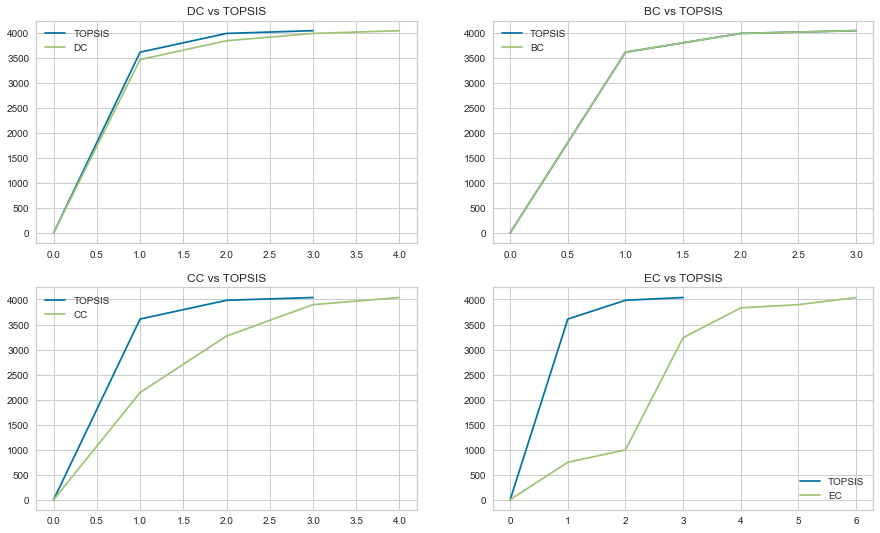

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
axs[0, 0].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[0, 0].plot(dc_si[0], dc_si[2], label="DC")
axs[0, 0].set_title("DC vs TOPSIS")
axs[0, 0].legend()

axs[0, 1].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[0, 1].plot(bc_si[0], bc_si[2], label="BC")
axs[0, 1].set_title("BC vs TOPSIS")
axs[0, 1].legend()

axs[1, 0].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[1, 0].plot(cc_si[0], cc_si[2], label="CC")
axs[1, 0].set_title("CC vs TOPSIS")
axs[1, 0].legend()

axs[1, 1].plot(topsis_si[0], topsis_si[2], label="TOPSIS")
axs[1, 1].plot(ec_si[0], ec_si[2], label="EC")
axs[1, 1].set_title("EC vs TOPSIS")
axs[1, 1].legend()

K-means Algorithm

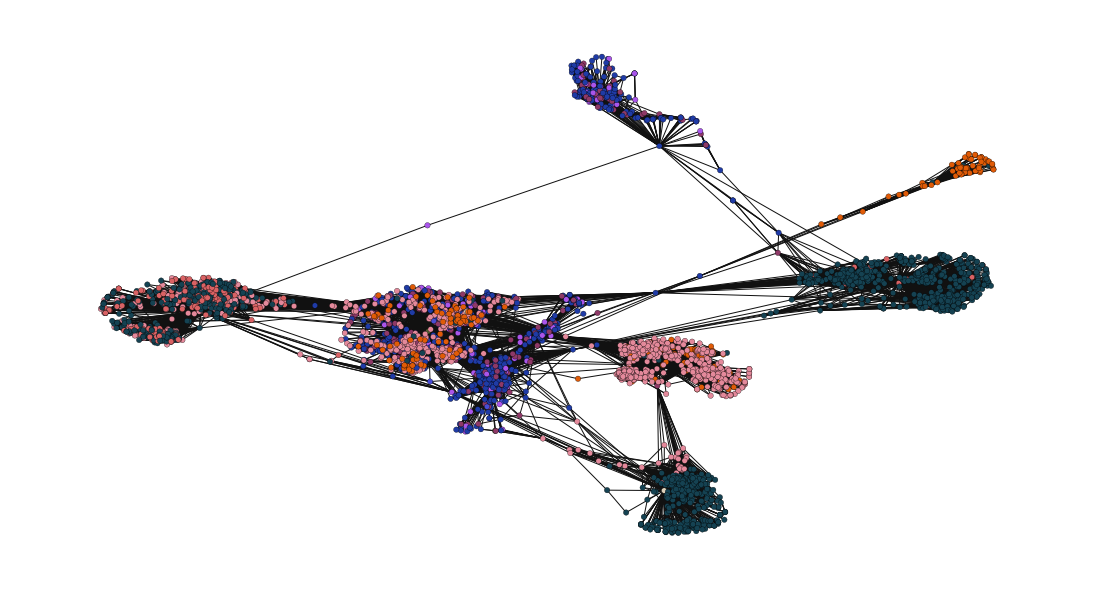

In [76]:
from sklearn.cluster import KMeans
import random

# decision_matrix contains all centrality measures given in the input of K-means algorithm
mesures_matrix = decision_matrix.to_numpy()

# n_clusters parameter is the number of clusters
# init parameter takes the centrality measures of the top k node generated by TOPSIS
y_pred = KMeans(n_clusters=k, init=mesures_matrix[top_k_node_topsis])
y_pred.fit(mesures_matrix)

# Asign a cluster to each node in the graph
cluster_list = []
for i in node_list:
  cluster_list.append(y_pred.labels_[i])
table['Cluster'] = cluster_list

# Generate k colors, color for each cluster
color = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
        for j in range(k)]
colors = []
for i in G_fb:
  colors.append(color[table['Cluster'][i]])

plt.rcParams.update({'figure.figsize': (15, 8)})
nx.draw(G_fb, node_color=colors, with_labels=False, edgecolors="black", node_size=30)
plt.show()

Visualize Nodes by Clusters

<function matplotlib.pyplot.show(close=None, block=None)>

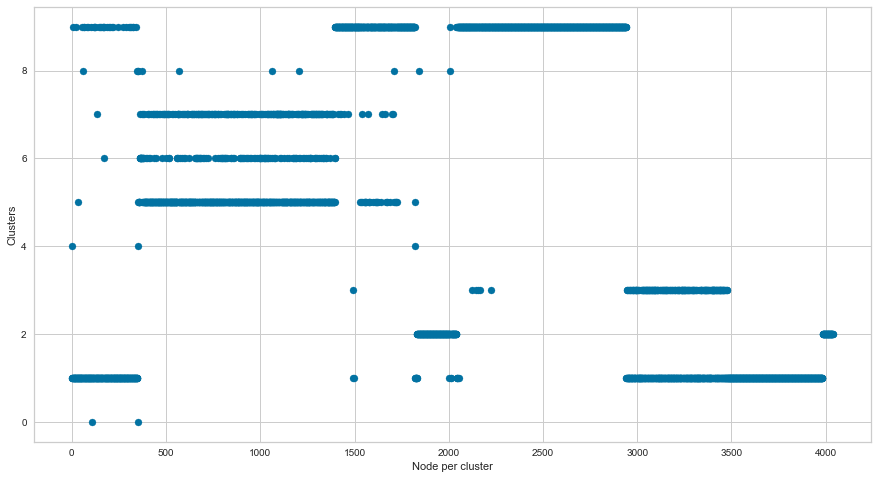

In [77]:
plt.scatter(table.index, table['Cluster'])
plt.xlabel("Node per cluster")
plt.ylabel("Clusters")
plt.show

Agglomerative Clustering

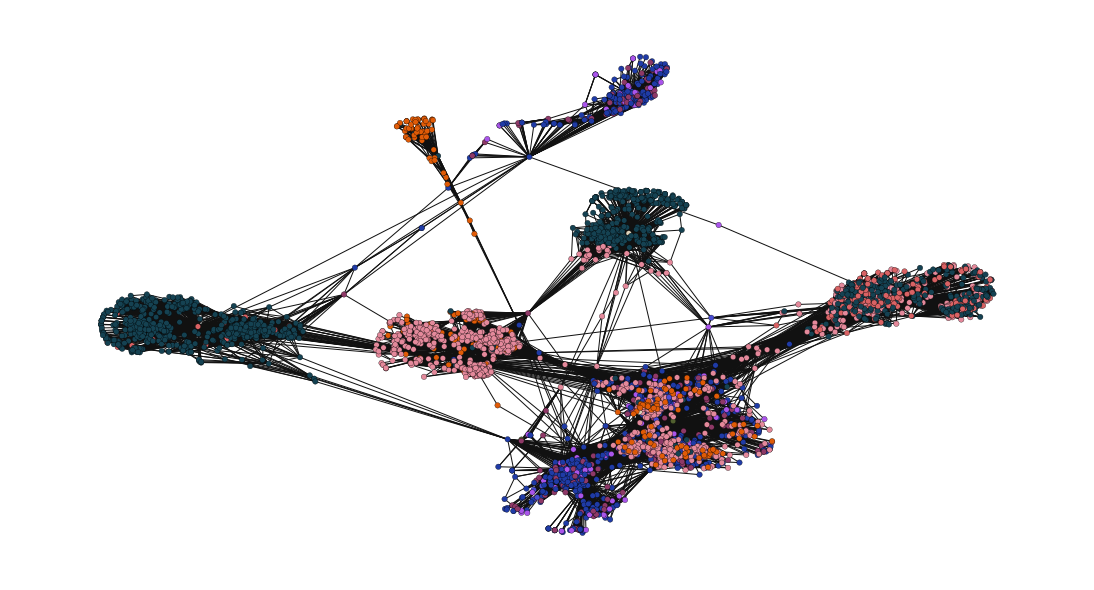

In [78]:
from sklearn import cluster

aggl = cluster.AgglomerativeClustering(n_clusters=k, linkage="ward")
aggl.fit(mesures_matrix)

plt.rcParams.update({'figure.figsize': (15, 8)})
nx.draw(G_fb, node_color=colors, with_labels=False, edgecolors="black", node_size=30)
plt.show()

Louvain - Community Discovery Library

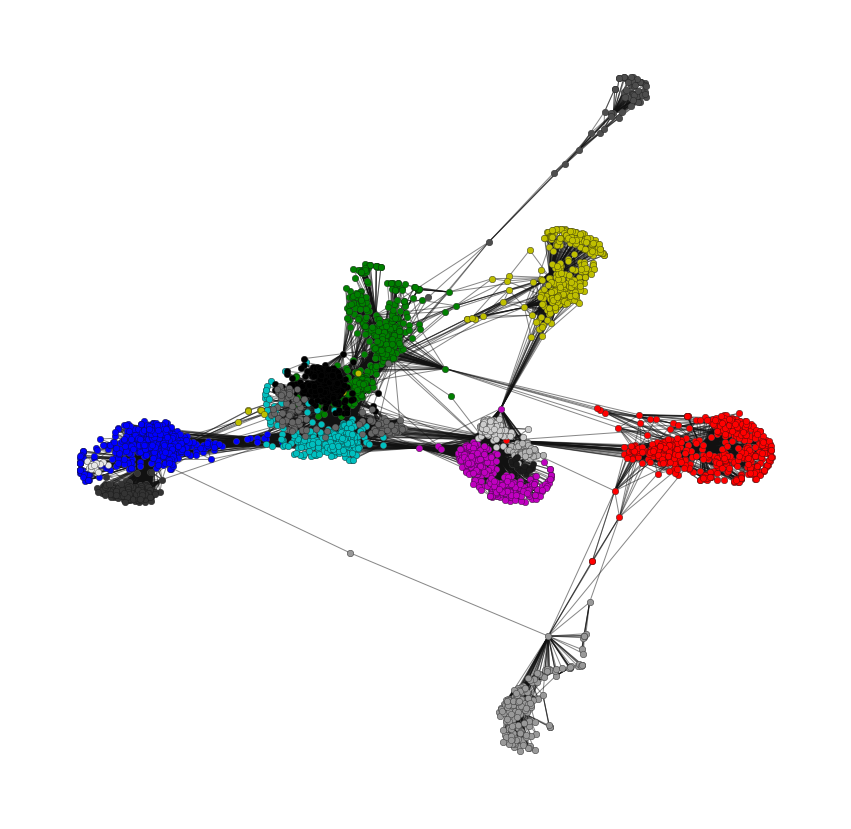

In [79]:
from cdlib import algorithms, viz

communities = algorithms.louvain(G_fb)

viz.plot_network_clusters(G_fb, communities, node_size=40, figsize=(15,15), plot_labels=False)

dynamic k-means clustering

1. Elbow methode

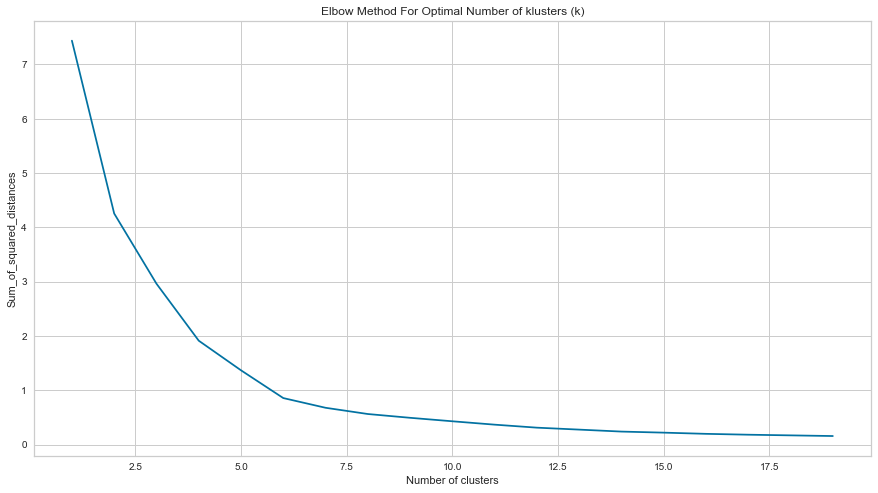

In [80]:
Sum_of_squared_distances = []

# Supose that we want to create 20 clusters in our graph 
# then we will determine the best value of k to get the optimal number of clusters from the elbow
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(mesures_matrix)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal Number of klusters (k)')
plt.show()

In [81]:
from kneed import KneeLocator

# KneeLocator helps us to get the exact k value calculated whit the elbow method whitout reat it from the previous plot
kn = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')
print("The optimal number of klusters is : ",kn.knee)

The optimal number of klusters is :  6


2. KElbow Visualizer

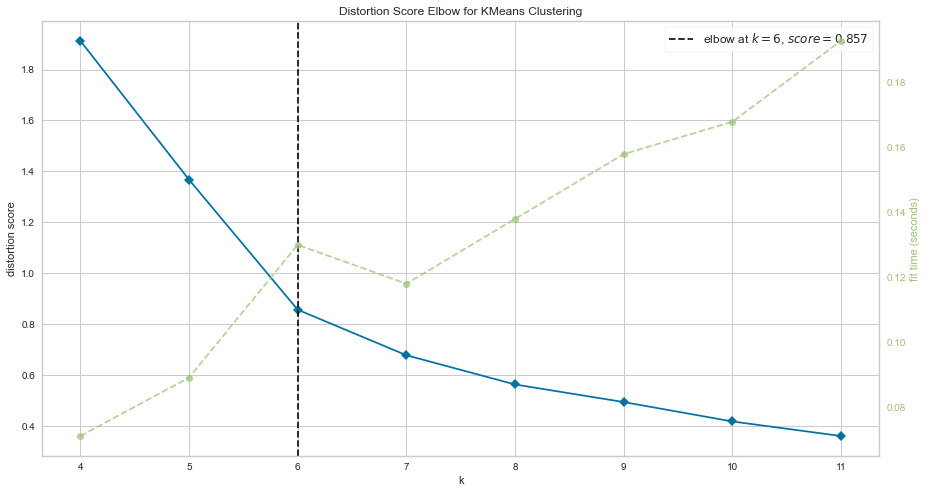

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

# Fit the data to the visualizer
visualizer.fit(mesures_matrix)

# Finalize and render the figure
visualizer.show()

3. Silhouette Visualizer

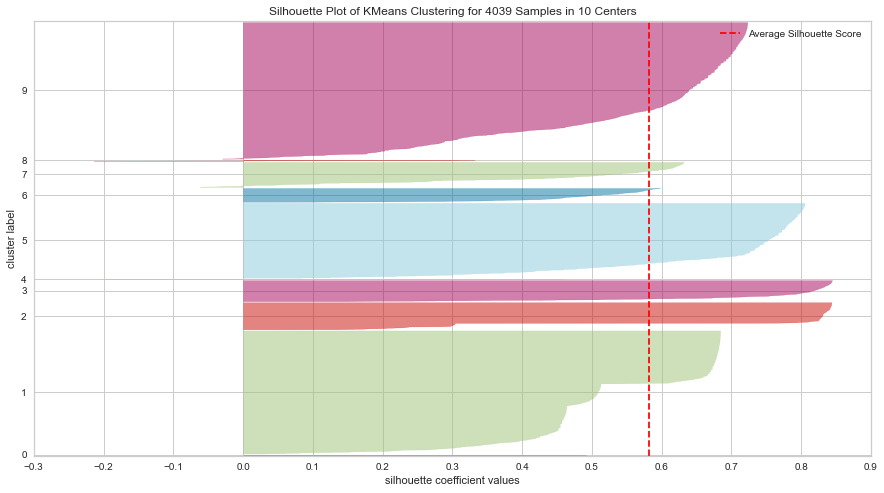

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4039 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [83]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters = 10, init = mesures_matrix[top_k_node_topsis])
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(mesures_matrix)

# Finalize and render the figure
visualizer.show()